In [1]:
import pyarrow.parquet as pq
import re

In [2]:
df_items = pq.read_table('../data2/dfitemsOpen_compr.parquet').to_pandas()
df_items = df_items.dropna(how='all')
df_items = df_items.drop(['0'], axis=1)

In [3]:
# Elimino las filas donde 'item_id', 'user_id', 'playtime_forever' son vacios
df_items = df_items.dropna(subset=['item_id', 'user_id', 'playtime_forever'])

# Elimino duplicados
df_items = df_items.drop_duplicates()

In [4]:
# Elimino columnas no relevantes
columnas = ['steam_id', 'user_url']
df_items = df_items.drop(columnas, axis=1)

In [5]:
# Elimino los caracteres especiales de la columna 'item_name'

df_items['item_name'] = df_items['item_name'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
df_items['item_name'] = df_items['item_name'].apply(lambda x: re.sub(r'\s+', ' ', x))

In [6]:
# Convierto todas las palabras de la columna 'item_name' en minúsculas
df_items['item_name'] = df_items['item_name'].str.lower()

In [7]:
# Convierto 'item_id' a integer
df_items['item_id'] = df_items['item_id'].astype(int)

In [8]:
df_items.head(2)

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,10,counter strike,6.0,0.0
1,76561197970982479,277,20,team fortress classic,0.0,0.0


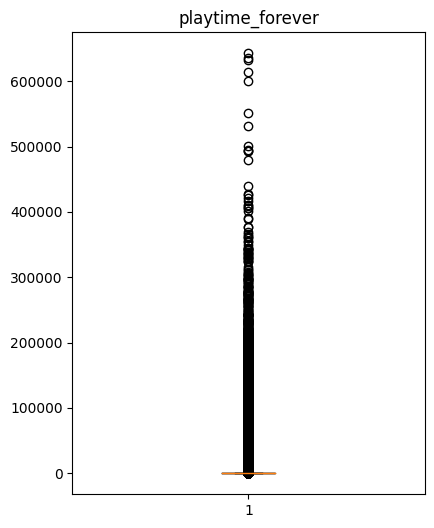

In [9]:
# Realizo un boxplot de 'playtime_forever'
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_items['playtime_forever'])
plt.title('playtime_forever')
plt.show()

In [10]:
# Detectamos outliers de la columna 'playtime_forever'
q1 = df_items['playtime_forever'].quantile(0.25)
q3 = df_items['playtime_forever'].quantile(0.75)
iqr = q3 - q1

In [11]:
# Intervalo donde están los datos que no son atípicos
q3 - 1.5 * iqr,q3 + 1.5 * iqr

(-178.5, 892.5)

In [12]:
# Calculo la mediana y la media
df_items['playtime_forever'].median(), df_items['playtime_forever'].mean()

(34.0, 994.8077144605081)

In [13]:
# Imputo los outliers con la mediana, ya que esta no es sensible a outliers
df_items.loc[df_items['playtime_forever'] > (q3 + 1.5 * iqr), 'playtime_forever'] = df_items['playtime_forever'].median()

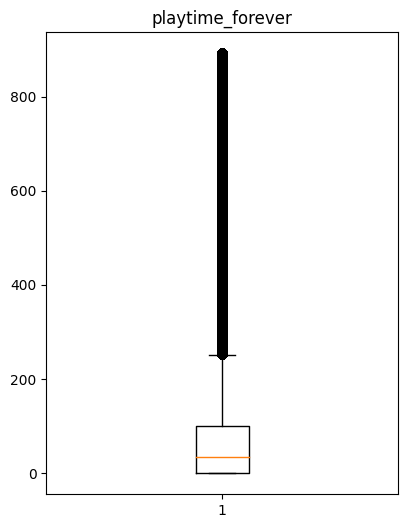

In [14]:
# Realizo un boxplot de 'playtime_forever'
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_items['playtime_forever'])
plt.title('playtime_forever')
plt.show()

In [15]:
# Guardo el dataset procesado para su posterior uso
df_items.to_parquet('../data2/df_items_limpio_compr.parquet')